В данном ноутбуке проанализируем страны по индексу Джини(надеюсь, тут не нужны пояснения) и сделаем явную визуализацию того, как индекс Джини распределен в зависимости от страны. 

В данном ноутбуке будем использовать веб-скраппинг(для того чтобы вытащить данные об индексе Джини с сторонних сайтов), sql(для того чтобы выделить нужную нам информацию) и самое главное - geopandas + использование новой библиотеки geoplot, которая не была затронута в курсе


In [ ]:
!pip install geopandas


In [ ]:
!pip install geoplot

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import sqlite3
import plotly.express as px
import geopandas as gpd
import geoplot

In [73]:
df = pd.read_csv('/content/csvData.csv')
world = gpd.read_file(
    gpd.datasets.get_path('naturalearth_lowres')
)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


/usr/local/lib/python3.7/dist-packages/geoplot/geoplot.py:885: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


[]

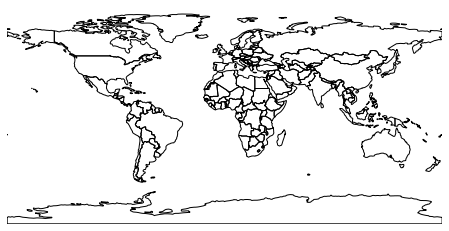

In [ ]:
world_map = geoplot.polyplot(world, figsize=(8, 4))
world_map.plot() 


In [ ]:
df.head()

,country,giniWB,yearWB,giniCIA,yearCIA,pop2022
0,South Africa,63.0,2014.0,63.0,2014.0,60756.135
1,Namibia,59.1,2015.0,59.1,2015.0,2633.874
2,Suriname,57.9,1999.0,NaN,NaN,596.831
3,Zambia,57.1,2015.0,57.1,2015.0,19470.234
4,Sao Tome and Principe,56.3,2017.0,56.3,2017.0,227.679


Использование SQL


Для того чтобы разметить наши данные об индексе Джини достанем информацию о местоположении стран с помощью специального сервиса GeoJson


In [ ]:
polygons = pd.read_csv("/content/ne_110m_admin_0_countries_geojson.csv")
polygons.head()

,geojson,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,...,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH
0,"{""type"":""MultiPolygon"",""coordinates"":[[[[180,-...",Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,Fiji,...,フィジー,피지,Fiji,Fidżi,Fiji,Фиджи,Fiji,Fiji,Fiji,斐濟
1,"{""type"":""MultiPolygon"",""coordinates"":[[[[33.90...",Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,United Republic of Tanzania,...,タンザニア,탄자니아,Tanzania,Tanzania,Tanzânia,Танзания,Tanzania,Tanzanya,Tanzania,坦桑尼亚
2,"{""type"":""MultiPolygon"",""coordinates"":[[[[-8.66...",Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,Western Sahara,...,西サハラ,서사하라,Westelijke Sahara,Sahara Zachodnia,Saara Ocidental,Западная Сахара,Västsahara,Batı Sahra,Tây Sahara,西撒哈拉
3,"{""type"":""MultiPolygon"",""coordinates"":[[[[-122....",Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,Canada,...,カナダ,캐나다,Canada,Kanada,Canadá,Канада,Kanada,Kanada,Canada,加拿大
4,"{""type"":""MultiPolygon"",""coordinates"":[[[[-122....",Admin-0 country,1,2,United States of America,US1,1,2,Country,United States of America,...,アメリカ合衆国,미국,Verenigde Staten van Amerika,Stany Zjednoczone,Estados Unidos,Соединённые Штаты Америки,USA,Amerika Birleşik Devletleri,Hoa Kỳ,美国


In [ ]:
import sqlite3

In [ ]:
conn = sqlite3.connect("gini_coefs")
c = conn.cursor()
c.execute("""
                DROP TABLE IF EXISTS gini_coefs;
            """)
df.to_sql("gini_coefs", conn)
"""Вывели какой-то отзыв"""
c.execute("""
                SELECT Country, giniWB FROM gini_coefs
                limit 1;
            """).fetchall()


[('South Africa', 63.0)]

In [ ]:
conn1 = sqlite3.connect("polygons_")
c1 = conn1.cursor()
c1.execute("""
                DROP TABLE IF EXISTS polygons_;
            """)
polygons.to_sql("polygons_", conn1)
"""Вывели какой-то отзыв"""
c1.execute("""
                SELECT geojson, sovereignt FROM polygons_
                limit 1;
            """).fetchall()


[('{"type":"MultiPolygon","coordinates":[[[[180,-16.06713266364244],[180,-16.55521656663919],[179.3641426619641,-16.80135407694688],[178.7250593629971,-17.01204167436803],[178.5968385951171,-16.63915],[179.0966093629971,-16.4339842775474],[179.4135093629971,-16.3790542775474],[180,-16.06713266364244]]],[[[178.12557,-17.50480999999999],[178.3736,-17.33991999999999],[178.71806,-17.62846],[178.5527099999999,-18.15059],[177.93266,-18.28799],[177.38146,-18.16432],[177.28504,-17.72465],[177.67087,-17.38114],[178.12557,-17.50480999999999]]],[[[-179.7933201090486,-16.02088225674122],[-179.9173693847652,-16.50178313564939],[-180,-16.55521656663919],[-180,-16.06713266364244],[-179.7933201090486,-16.02088225674122]]]]}',
  'Fiji')]

In [67]:
c.execute("""
                DROP TABLE IF EXISTS final;
            """)
c.execute(""" Create table final as
SELECT Country, giniWB, geojson  FROM gini_coefs left join polygons_
on gini_coefs.Country = polygons_.sovereignt""").fetchall()


[]

In [ ]:
import mapclassify

хмм, попробовали сделать с помощью SQL, но с SQL не поддерживается формат geopandas, поэтому нам нужно сейчас проделать ту же работу в pandas. Но зато показали, что умеем пользоваться SQL!

In [68]:
df.head()

,country,giniWB,yearWB,giniCIA,yearCIA,pop2022
0,South Africa,63.0,2014.0,63.0,2014.0,60756.135
1,Namibia,59.1,2015.0,59.1,2015.0,2633.874
2,Suriname,57.9,1999.0,NaN,NaN,596.831
3,Zambia,57.1,2015.0,57.1,2015.0,19470.234
4,Sao Tome and Principe,56.3,2017.0,56.3,2017.0,227.679


In [69]:
polygons = polygons[['geojson', 'SOVEREIGNT']]

In [71]:
countries = pd.read_csv('/content/worldcities.csv')
countries.head()


,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6839,139.7744,Japan,JP,JPN,Tōkyō,primary,39105000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,35362000.0,1360771077
2,Delhi,Delhi,28.6667,77.2167,India,IN,IND,Delhi,admin,31870000.0,1356872604
3,Manila,Manila,14.6000,120.9833,Philippines,PH,PHL,Manila,primary,23971000.0,1608618140
4,São Paulo,Sao Paulo,-23.5504,-46.6339,Brazil,BR,BRA,São Paulo,admin,22495000.0,1076532519


In [91]:
gini_coefs_table = df[['country', 'giniWB']]
gini_coefs_table.head()
world = pd.merge(gini_coefs_table, world, left_on='country', right_on='name')
world = gpd.GeoDataFrame(world)

Выводим с помощью geopandas карту, на которой наглядно предоставлена информация о коэффициенте Джини в разных странах!

In [96]:
fig, ax = plt.subplots(1, 1, figsize=(150, 150))

world.plot(column='giniWB', ax=ax, legend=True)